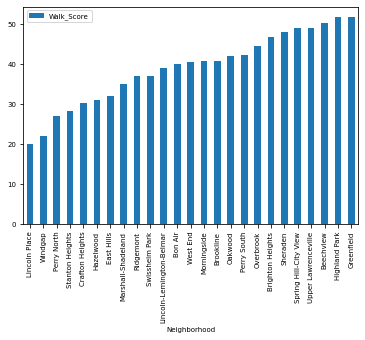

In [75]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 7
#ct = pd.read_csv("ct.csv")
blks = pd.read_csv("blocks.csv")
wd = pd.read_csv("walkscores.csv")
blks = blks.filter(items=["TRACT", "BLKGRP", "Neighborhood" ])

data = ({
    'Neighborhood':[],
    'Walk_Score':[]
})

df = pd.DataFrame(data)
#print(df)


def AvgOut(df):
    lookup = [""]
    hood = ""
    data = ({
    'Neighborhood':[],
    'Walk_Score':[]
    })
    #hd = pd.DataFrame(columns = ["Neighborhood", "Walk_Score"])
    
    hd = pd.DataFrame(data)
    for row in df.itertuples():
        hood = row[1]
        score = row[2];
       # print("this is the row" + hood)
        
        for value in df.itertuples():
            if(value[1] == row[1]):
                avg = (value[2] + row[2])/2
                score = (score + avg)/2
        
        list = [hood, score]
        
        if hood not in lookup:
            hd.loc[len(hd)] = list
   
        lookup.append(hood)
        
    return hd

def TractToHood(tracts, hoods):
    columns = ["Census_Tract", "Walk_Scores"]
    
    id = tracts
    name = ""
   
    for row in hoods.itertuples():
        if row[1] == id:
            name = row[3]
    return name
    
wd["Census_Tract"] = wd.Census_Tract.apply(TractToHood, hoods=blks)


wd = wd[wd.Census_Tract != ""]
wd = wd.sort_values("Walk_Score")

#wd.head(25).plot.bar(x="Census_Tract", y="Walk_Score")
#wd.tail(100).plot.bar(x="Census_Tract", y="Walk_Score")

#print(wd)
#print(wd.Walk_Score.describe())

avgWalk = AvgOut(wd)
#print(avgWalk.tail(100))
avgWalk = avgWalk.sort_values("Walk_Score")

avgWalk.head(25).plot.bar(x="Neighborhood", y="Walk_Score")










## Walkability

The data on this page is adapted from the Allegheny County walk scores database and Pittsburgh 2010 census track data both from WPRDC
The walk scores came in a two collumn csv with census tracts and walk scores. i had to create a map function to translate those census tracts into neighborhoods using the 2010 census track data. after this i was able to present the data as shown. 

analyzing the data i beleive that this will not be one of out leading metrics and will be best suited for comparing againsts other high ranking neighborhoods from my partners metrics. i think this becasue one, seeing how the strip district is the highest score, i think that the compounding variables of being in a commerical district are significant, but controlled if used in context of other metrics. and two, the census tracts are not a true 1 to 1 of neighborhood, this leads to seemingly duplicate entries in the final data but this is simply becasue multiple tracts can exist in one neighborhood, so it will be best to use walk scores to more so differentiate other high metric neighborhoods. 

# statistics
we can generate descriptive statistics on the walk score to gain a general understanding of pittsburghs walkability
* mean : 59.4
* std  : 19.78
* min  : 20.0
* 25%  : 43.0
* 75%  : 76.0 
* max  : 100.0